# Программирование для всех (основы работы с Python)

*Алла Тамбовцева, НИУ ВШЭ*

### Работа с датафреймами Pandas:  часть 1

*Часть 1 включает:*

* Загрузка csv-файлов. 
* Описание датафрейма: методы `.info()`, `.describe()` и др.
* Выбор столбца датафрейма по названию и его описание.
* Построение гистограммы для числового столбца и выбор цвета.

### Загрузка файлов

Как мы уже выяснили, библиотека pandas позволяет нам загрузить данные из файла и оформить их в датафрейм. Загрузим файл `firtree.csv` со страницы курса по ссылке и сохраним в датафрейм `tree`:

In [1]:
import pandas as pd
tree = pd.read_csv("https://allatambov.github.io/pydj/seminars/firtree.csv")

Мы могли скачать этот файл себе на компьютер, поместить в рабочую папку через кнопку *Upload* на главной странице *Home* в Jupyter, а потом загрузить его по названию:

In [2]:
tree = pd.read_csv("firtree.csv")

Если файл лежит в какой-то другой папке, его тоже можно достать, прописав полный путь к файлу, но там есть свои сложности, обсудим их позже. А пока посмотрим на то, как описать датафрейм и данные в нем.

### Описание датафрейма

В файле `firtree.csv` хранятся результаты вымышленного опроса покупателей на елочном базаре.

Предполагается, что посетителям елочного базара предлагалось оценить елки разных видов – определить, насколько хороша елка, и назвать сумму, которую они готовы за нее отдать.

**Показатели в файле:**

* `gender` – пол респондента;

* `ftype` – тип елки, которую оценивал респондент;

* `height` – высота елки в сантиметрах;

* `expenses` – сумма (в рублях), которую респондент готов отдать за елку;

* `score` – оценка, которую респондент поставил елке (1 – очень плохо, 5 – отлично);

* `wish` – ответ на вопрос «Хотели бы, чтобы Вам подарили такую елку?» (да, нет).


Теперь посмотрим на техническое описание датафрейма:

In [3]:
tree.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
Unnamed: 0    1200 non-null int64
gender        1200 non-null object
ftype         1200 non-null object
height        1200 non-null int64
score         1200 non-null int64
expenses      1200 non-null int64
wish          1198 non-null object
dtypes: int64(4), object(3)
memory usage: 65.8+ KB


Какую информацию выдал метод `.info()`? Во-первых, он сообщил нам, что `tree` является объектом *DataFrame*. Во-вторых, он вывел число строк (`RangeIndex: 1200 entries`) и показал их индексы (`0 to 1199`). В-третьих, он вывел число столбцов (`total 7 columns`). Наконец, он выдал информацию по каждому столбцу. Остановимся на этом поподробнее.

В выдаче выше представлено, сколько непустых элементов содержится в каждом столбце. Непустые элементы *non-null* – это все, кроме пропущенных значений, которые кодируются особым образом (`NaN` – от *Not A Number*). В нашей таблице есть столбец `wish`, который заполнен неполностью.

Далее указан тип каждого столбца, целочисленный `int64` и строковый `object`. Что означают числа в конце? Это объем памяти, который требуется для хранения.

Если нас интересует только число строк и столбцов, можем запросить атрибут `.shape`:

In [4]:
tree.shape

(1200, 7)

Сводную статистическую информацию можно получить с помощью метода `.describe()`.

In [5]:
tree.describe()

,Unnamed: 0,height,score,expenses
count,1200.000000,1200.000000,1200.00000,1200.000000
mean,600.500000,159.066667,3.00500,1629.045000
std,346.554469,51.698012,1.42009,792.819383
min,1.000000,70.000000,1.00000,302.000000
25%,300.750000,115.000000,2.00000,904.750000
50%,600.500000,157.000000,3.00000,1630.500000
75%,900.250000,203.250000,4.00000,2300.000000
max,1200.000000,250.000000,5.00000,2999.000000


По умолчанию этот метод выбирает только числовые столбцы и выводит для них описательные статистики: 

* `count` – число заполненных значений;
* `mean` – среднее арифметическое;
* `std` – стандартное отклонение (показатель разброса данных относительно среднего значения);
* `min` – минимальное значение;
* `max` – максимальное значение;
* `25%` – нижний квартиль (значение, которое 25% значений не превышают);
* `50%` – медиана (значение, которое 50% значений не превышают);
* `75%` – верхний квартиль (значение, которое 75% значений не превышают).

Если мы все же хотим описать все столбцы, а не только числовые, можем добавить аргумент `include = 'all'`:

In [6]:
tree.describe(include = 'all')  

,Unnamed: 0,gender,ftype,height,score,expenses,wish
count,1200.000000,1200,1200,1200.000000,1200.00000,1200.000000,1198
unique,NaN,2,4,NaN,NaN,NaN,2
top,NaN,female,сосна Крым,NaN,NaN,NaN,да
freq,NaN,612,327,NaN,NaN,NaN,611
mean,600.500000,NaN,NaN,159.066667,3.00500,1629.045000,NaN
std,346.554469,NaN,NaN,51.698012,1.42009,792.819383,NaN
min,1.000000,NaN,NaN,70.000000,1.00000,302.000000,NaN
25%,300.750000,NaN,NaN,115.000000,2.00000,904.750000,NaN
50%,600.500000,NaN,NaN,157.000000,3.00000,1630.500000,NaN
75%,900.250000,NaN,NaN,203.250000,4.00000,2300.000000,NaN


В таблице выше добавились строки `unique`, `top` и `freq`. Эти характеристики описывают только текстовые столбцы типа *object*:

* `unique` – число уникальных значений в столбце (в `gender` их 2,  `male` и `female`);

* `top` – значение, которое встречается чаще всех (в `gender` больше женщин);

* `freq` – частота для значения в `top` (в `gender` 612 женщин).

Если датафрейм большой, а мы хотим быстро посмотреть на то, какого он вида, можем запросить на экран только первые строчки или последние:

In [7]:
tree.head()  # первые

,Unnamed: 0,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет


In [8]:
tree.tail()  # последние  

,Unnamed: 0,gender,ftype,height,score,expenses,wish
1195,1196,male,ель обыкновенная,137,2,1298,нет
1196,1197,female,пихта Нобилис,141,3,906,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да
1199,1200,male,сосна датская,105,5,2204,нет


Если нам нужно другое число строк (не 5, которые показываются по умолчанию), это можно исправить:

In [9]:
tree.tail(8)  # для head() будет так же 

,Unnamed: 0,gender,ftype,height,score,expenses,wish
1192,1193,male,сосна датская,131,5,2683,нет
1193,1194,male,сосна Крым,138,4,304,да
1194,1195,female,ель обыкновенная,127,4,2932,нет
1195,1196,male,ель обыкновенная,137,2,1298,нет
1196,1197,female,пихта Нобилис,141,3,906,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да
1199,1200,male,сосна датская,105,5,2204,нет


### Выбор столбца датафрейма и его описание

Теперь выберем определенный столбец и опишем его. Для выбора столбца достаточно указать его название в квадратных скобках (и обязательно в кавычках, так как название является строкой):

In [10]:
tree["wish"] 

0        да
1       нет
2        да
3        да
4       нет
       ... 
1195    нет
1196     да
1197    нет
1198     да
1199    нет
Name: wish, Length: 1200, dtype: object

Еще столбец можно выбрать, не используя квадратные скобки, а просто указав его название через точку:

In [11]:
tree.wish

0        да
1       нет
2        да
3        да
4       нет
       ... 
1195    нет
1196     да
1197    нет
1198     да
1199    нет
Name: wish, Length: 1200, dtype: object

Однако такой способ не универсален. В случае, если в названии столбца используются недопустимые для переменных символы (пробелы, тире, кириллические буквы), этот метод не подойдет. Для создания нового столбца этот способ тоже не сработает.

Теперь опишем столбец `wish`. Для начала узнаем число заполненных (не NULL и NaN) значений:

In [12]:
tree["wish"].count() 

1198

Так как столбец текстовый, вряд ли будет уместно считать для него среднее, медиану или что-то подобное. Поэтому мы посмотрим на уникальные значения и их частоты:

In [13]:
tree["wish"].unique()  # массив уникальных значений

array(['да', 'нет', nan], dtype=object)

In [14]:
tree["wish"].value_counts() # их частоты, уже без учета NaN

да     611
нет    587
Name: wish, dtype: int64

Теперь выберем числовой столбец `expenses` и опишем его: выведем минимальное значение, максимальное значение и среднее.

In [15]:
tree["expenses"].min()

302

In [16]:
tree["expenses"].max()

2999

In [17]:
tree["expenses"].mean()

1629.045

Как мы уже видели, метод `.describe()` умеет выводить характеристики столбцов всех типов сразу, однако это не всегда выглядит симпатично, так как добавляется много NaN (часть показателей не считается для типа `object`, часть – наоборот). Для удобства можно заранее выбрать все столбцы определенного типа, а потом их описывать:

In [18]:
tree.select_dtypes("int")  # все столбцы типа integer

,Unnamed: 0,height,score,expenses
0,1,190,3,1051
1,2,174,3,2378
2,3,248,4,655
3,4,191,1,2934
4,5,147,3,1198
...,...,...,...,...
1195,1196,137,2,1298
1196,1197,141,3,906
1197,1198,220,5,1591
1198,1199,94,1,1966


In [19]:
tree.select_dtypes("object")

,gender,ftype,wish
0,female,пихта Нобилис,да
1,male,пихта Нобилис,нет
2,female,сосна Крым,да
3,female,сосна Крым,да
4,female,сосна Крым,нет
...,...,...,...
1195,male,ель обыкновенная,нет
1196,female,пихта Нобилис,да
1197,male,сосна Крым,нет
1198,male,сосна датская,да


In [20]:
tree.select_dtypes(["int", "float"])  # если более 1 типа

,Unnamed: 0,height,score,expenses
0,1,190,3,1051
1,2,174,3,2378
2,3,248,4,655
3,4,191,1,2934
4,5,147,3,1198
...,...,...,...,...
1195,1196,137,2,1298
1196,1197,141,3,906
1197,1198,220,5,1591
1198,1199,94,1,1966


### Построение гистограммы для числового столбца

В завершение знакомства с описанием датафреймов Pandas, построим гистограмму для визуализации распределения значений в столбце `expenses`. Для этого нам понадобится библиотека `matpoltlib` для визуализации. Импортируем оттуда модуль `pyplot`:

In [21]:
from matplotlib import pyplot as plt

И напишем магическую строку с `%`, которая позволит Jupyter строить графики прямо в текущем файле, в ячейке после кода, а не в отдельном окне:

In [22]:
%matplotlib inline

Строим гистограмму:

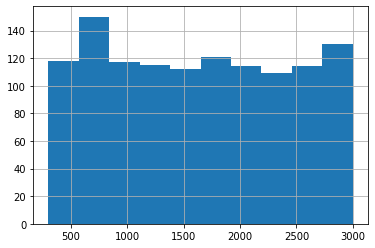

In [23]:
tree["expenses"].hist() 

Поменяем цвет:

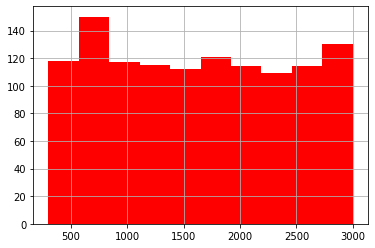

In [24]:
tree["expenses"].hist(color = "red") 

Библиотека `matplotlib` умеет работать с разными форматами цветов, поэтому цвет можно указывать, например, в формате *hexadecimal* (c `#`):

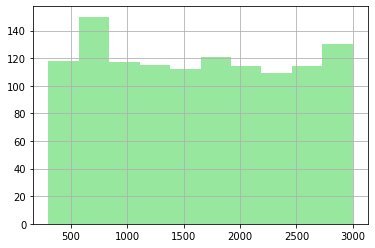

In [26]:
tree["expenses"].hist(color = "#97e89e") 

Почитать про цвета в `matplotlib` можно [здесь](https://matplotlib.org/2.0.2/api/colors_api.html), а почитать про форматы цветов – [здесь](https://www.w3schools.com/colors/default.asp). 

*Дополнение:* если набрать `color picker` в Google, он выдаст свой настройщик цветов, в котором можно выбрать цвет, а потом узнать его код в формате *HEX* или *RGB*. 

### Выбор строк по условию

Часто при работе с датафреймом нас не интересует выбор отдельных строк по названию или номеру, а интересует фильтрация наблюдений – выбор строк датафрейма, которые удовлетворяют определенному условию. Для этого интересующее нас условие необходимо указать в квадратных скобках. Например, выберем только те строки, которые соответствуют людям, готовым отдать более 1500 рублей за елку:

In [27]:
tree[tree["expenses"] > 1500]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
1,2,male,пихта Нобилис,174,3,2378,нет
3,4,female,сосна Крым,191,1,2934,да
5,6,male,сосна Крым,91,3,2139,да
7,8,female,ель обыкновенная,94,2,2707,нет
9,10,male,сосна датская,221,4,1521,нет
...,...,...,...,...,...,...,...
1192,1193,male,сосна датская,131,5,2683,нет
1194,1195,female,ель обыкновенная,127,4,2932,нет
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да


Почему нельзя было написать проще, то есть `tree["expenses"] > 1500`? Давайте напишем, и посмотрим, что получится:

In [28]:
tree["expenses"] > 1500

0       False
1        True
2       False
3        True
4       False
        ...  
1195    False
1196    False
1197     True
1198     True
1199     True
Name: expenses, Length: 1200, dtype: bool

Что мы увидели? Просто результат проверки условия, набор из `True` и `False`. Когда мы подставляем это выражение в квадратные скобки, Python выбирает из `tree` те строки, где выражение принимает значение `True`.

Все операторы для проверки и объединения условий работают как обычно. Например, два условия одновременно: строки, соответствующие елкам, которые оценили дороже 1500 рублей и которые респонденты хотели бы приобрести себе:\

In [29]:
tree[(tree["expenses"] > 1500) & (tree["wish"] == "да")]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
3,4,female,сосна Крым,191,1,2934,да
5,6,male,сосна Крым,91,3,2139,да
17,18,male,сосна датская,151,5,2715,да
18,19,male,сосна Крым,227,3,2771,да
22,23,female,пихта Нобилис,128,4,2424,да
...,...,...,...,...,...,...,...
1186,1187,female,ель обыкновенная,246,2,2861,да
1188,1189,female,пихта Нобилис,103,5,2647,да
1189,1190,female,ель обыкновенная,226,5,2990,да
1191,1192,male,пихта Нобилис,158,4,2715,да


Все сосны, либо сосны Крым, либо датские сосны:

In [30]:
tree[(tree["ftype"] == "сосна Крым") | 
     (tree["ftype"] == "сосна датская")]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет
5,6,male,сосна Крым,91,3,2139,да
9,10,male,сосна датская,221,4,1521,нет
...,...,...,...,...,...,...,...
1192,1193,male,сосна датская,131,5,2683,нет
1193,1194,male,сосна Крым,138,4,304,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да


Если бы типов сосен было много, было бы неудобно прописывать через `|` условия для каждого типа. Тогда логично было бы воспользоваться методом, который позволяет выбрать все строки, где в ячейке с текстом встречается слово «сосна». Такой метод есть – это метод на строках `.contains()`, который возвращает `True` если некоторая подстрока (набор символов) входит в строку, и `False` – в противном случае.

In [31]:
tree[tree["ftype"].str.contains("сосна")]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет
5,6,male,сосна Крым,91,3,2139,да
9,10,male,сосна датская,221,4,1521,нет
...,...,...,...,...,...,...,...
1192,1193,male,сосна датская,131,5,2683,нет
1193,1194,male,сосна Крым,138,4,304,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да


А если наоборот, нам нужно отрицание – все строки, которые относятся к чему угодно, только не к соснам? Можно проверить равенство `False`:

In [32]:
tree[tree["ftype"].str.contains("сосна") == False]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
6,7,male,ель обыкновенная,151,5,702,да
7,8,female,ель обыкновенная,94,2,2707,нет
8,9,female,ель обыкновенная,138,5,713,нет
...,...,...,...,...,...,...,...
1189,1190,female,ель обыкновенная,226,5,2990,да
1191,1192,male,пихта Нобилис,158,4,2715,да
1194,1195,female,ель обыкновенная,127,4,2932,нет
1195,1196,male,ель обыкновенная,137,2,1298,нет


А можно воспользоваться оператором `~` для отрицания и поставить его перед всем условием в скобках:

In [33]:
tree[~tree["ftype"].str.contains("сосна")]

,Unnamed: 0,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
6,7,male,ель обыкновенная,151,5,702,да
7,8,female,ель обыкновенная,94,2,2707,нет
8,9,female,ель обыкновенная,138,5,713,нет
...,...,...,...,...,...,...,...
1189,1190,female,ель обыкновенная,226,5,2990,да
1191,1192,male,пихта Нобилис,158,4,2715,да
1194,1195,female,ель обыкновенная,127,4,2932,нет
1195,1196,male,ель обыкновенная,137,2,1298,нет


### Выбор строк и столбцов по названию и по номеру

Отдельный столбец по названию мы уже выбрали:

In [34]:
tree["wish"]

0        да
1       нет
2        да
3        да
4       нет
       ... 
1195    нет
1196     да
1197    нет
1198     да
1199    нет
Name: wish, Length: 1200, dtype: object

Если нам нужно сразу несколько столбцов (маленький датафрейм на основе старого), то названия столбцов необходимо оформить в виде списка и указать его в квадратных скобках:

In [35]:
tree[["ftype", "score"]]

,ftype,score
0,пихта Нобилис,3
1,пихта Нобилис,3
2,сосна Крым,4
3,сосна Крым,1
4,сосна Крым,3
...,...,...
1195,ель обыкновенная,2
1196,пихта Нобилис,3
1197,сосна Крым,5
1198,сосна датская,1


Если нам нужно несколько столбцов подряд, начиная с одного названия и заканчивая другим, можно воспользоваться методом `.loc`:

In [36]:
tree.loc[:, "ftype":"score"] 

,ftype,height,score
0,пихта Нобилис,190,3
1,пихта Нобилис,174,3
2,сосна Крым,248,4
3,сосна Крым,191,1
4,сосна Крым,147,3
...,...,...,...
1195,ель обыкновенная,137,2
1196,пихта Нобилис,141,3
1197,сосна Крым,220,5
1198,сосна датская,94,1


Метод `.loc` используется для выбора определенных строк и столбцов, поэтому в квадратных скобках образуется запись через запятую: на первом месте условия для строк, на втором – для столбцов. Здесь нас интересуют все строки (полный срез через `:`) и конкретные столбцы, с `ftype` по `score` включительно.

Если бы мы хотели выбрать строки с 0 по 12 и столбцы с `ftype` по `score`, тоже бы пригодился метод `.loc`:

In [37]:
tree.loc[0:12, "ftype":"score"]

,ftype,height,score
0,пихта Нобилис,190,3
1,пихта Нобилис,174,3
2,сосна Крым,248,4
3,сосна Крым,191,1
4,сосна Крым,147,3
5,сосна Крым,91,3
6,ель обыкновенная,151,5
7,ель обыкновенная,94,2
8,ель обыкновенная,138,5
9,сосна датская,221,4


**Внимание:** хотя в `.loc` мы задействуем обычные питоновские срезы, внутри этого метода срезы включают как левый, так и правый конец среза. Так, в примере выше были выбраны строки по 12-ую включительно и столбец `score` так же был включен.

Иногда может возникнуть необходимость выбрать столбец по его порядковому номеру. Например, когда названий столбцов нет как таковых или когда названия слишком длинные, а переименовывать их нежелательно. Сделать это можно с помощью метода `.iloc` (`i` – от *index*). Выберем строки с 0 по 11 и столбцы со второго по третий:

In [38]:
tree.iloc[0:12, 2:4]

,ftype,height
0,пихта Нобилис,190
1,пихта Нобилис,174
2,сосна Крым,248
3,сосна Крым,191
4,сосна Крым,147
5,сосна Крым,91
6,ель обыкновенная,151
7,ель обыкновенная,94
8,ель обыкновенная,138
9,сосна датская,221


**Внимание:** в методе `.iloc`, поскольку работа идет с обычными числовыми индексами (как в списках и кортежах), правый конец среза исключается. Поэтому в примере выше 12-я строка и 4-ый столбец показаны не были.

Если в `.iloc` вписать только одно число, по умолчанию будет выдана строка с таким номером:

In [39]:
tree.iloc[2]

Unnamed: 0             3
gender            female
ftype         сосна Крым
height               248
score                  4
expenses             655
wish                  да
Name: 2, dtype: object

Это будет объект типа *pandas Series*:

In [40]:
type(tree.iloc[2]) 

pandas.core.series.Series

### Переименование столбцов

Посмотрим на список названий всех столбцов (точнее, это будет объект специального типа *Index*, который внутри очень похож на массив):

In [41]:
tree.columns

Index(['Unnamed: 0', 'gender', 'ftype', 'height', 'score', 'expenses', 'wish'], dtype='object')

Аналогичным образом посмотрим на названия строк:

In [42]:
tree.index

RangeIndex(start=0, stop=1200, step=1)

Строки не имеют специально заданных текстовых названий, поэтому они автоматически названы по промежутку из целых чисел `RangeIndex` от 0 до 1200.

Теперь попробуем переименовать столбец `Unnamed: 0` и дать ему более симпатичное название. Так как это по сути номер респондента, назовем его `id`. Воспользуемся методом `.rename()`:

In [43]:
tree.rename(columns = {"Unnamed: 0": "id"})

,id,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет
...,...,...,...,...,...,...,...
1195,1196,male,ель обыкновенная,137,2,1298,нет
1196,1197,female,пихта Нобилис,141,3,906,да
1197,1198,male,сосна Крым,220,5,1591,нет
1198,1199,male,сосна датская,94,1,1966,да


Метод `.rename()` по умолчанию работает со строками, поэтому необходимо явно указать, что изменения применяются к столбцам – аргумент `columns`. Далее в качестве значения этого аргумента запишем словарь, где ключом будет старое название столбца, а значением – новое название столбца.

Посмотрим теперь на первые несколько строк в `tree`:

In [44]:
tree.head() 

,Unnamed: 0,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет


Столбец не переименовался! Почему? Потому что многие методы в pandas не сохраняют изменения в исходном датафрейме, а возвращают копию датафрейма с внесенными изменениями, чтобы пользователь не мог случайно «испортить» датафрейм. Чтобы сохранить изменения, нужно дописать опцию `inplace=True` (записать изменения на место старых данных):

In [45]:
# теперь все ок
tree.rename(columns = {"Unnamed: 0": "id"}, inplace = True)  
tree.head()

,id,gender,ftype,height,score,expenses,wish
0,1,female,пихта Нобилис,190,3,1051,да
1,2,male,пихта Нобилис,174,3,2378,нет
2,3,female,сосна Крым,248,4,655,да
3,4,female,сосна Крым,191,1,2934,да
4,5,female,сосна Крым,147,3,1198,нет


**Внимание:** датафрейм является изменяемым типом данных (как и список). То есть, если понадобится создать копию датафрейма для тестирования всякого рода изменений, ее нужно будет создавать через метод `.copy()`. Запись вида `df2 = df1` создаст не копию датафрейма `df1`, а лишь ссылку на него, поэтому при изменении `df2` датафрейм `df1` тоже изменится.

### Добавление новых столбцов

Так как отдельный столбец датафрейма является объектом типа *pandas Series*, который наследует свойства массива, выполнять операции над столбцами довольно просто. Например, мы хотим добавить в `tree` столбец с высотой елки в метрах. Для этого достаточно выбрать столбец `height` и поделить все его значения на 100:

In [46]:
tree["height"] / 100

0       1.90
1       1.74
2       2.48
3       1.91
4       1.47
        ... 
1195    1.37
1196    1.41
1197    2.20
1198    0.94
1199    1.05
Name: height, Length: 1200, dtype: float64

Теперь запишем полученный результат в новый столбец `height_m` датафрейма `tree`:

In [47]:
tree["height_m"] = tree["height"] / 100

In [48]:
tree.head() 

,id,gender,ftype,height,score,expenses,wish,height_m
0,1,female,пихта Нобилис,190,3,1051,да,1.90
1,2,male,пихта Нобилис,174,3,2378,нет,1.74
2,3,female,сосна Крым,248,4,655,да,2.48
3,4,female,сосна Крым,191,1,2934,да,1.91
4,5,female,сосна Крым,147,3,1198,нет,1.47


По умолчанию новые столбцы записываются в конец датафрейма, но при желании столбцы можно упорядочить по своему желанию.

**Пример:** в некотором датафрейме `df` есть столбцы `a`, `b`, `c`, мы хотим, поменять их местами так, чтобы сначала был `c`, потом `a`, а потом `b`:

    cols = ['c', 'a', 'b']
    df = df[cols]

Теперь рассмотрим случай посложнее. Допустим, мы хотим добавить новый столбец `female`, который будет содержать значения 1 (респондент женского пола) и 0 (респондент мужского пола). Напишем маленькую функцию и применим ее, воспользовавшись методом `.apply()`.

In [49]:
def gender_fun(x):
    if x == "female":
        r = 1
    else:
        r = 0
    return r

In [50]:
tree["female"] = tree["gender"].apply(gender_fun) 

In [51]:
tree.head()

,id,gender,ftype,height,score,expenses,wish,height_m,female
0,1,female,пихта Нобилис,190,3,1051,да,1.90,1
1,2,male,пихта Нобилис,174,3,2378,нет,1.74,0
2,3,female,сосна Крым,248,4,655,да,2.48,1
3,4,female,сосна Крым,191,1,2934,да,1.91,1
4,5,female,сосна Крым,147,3,1198,нет,1.47,1


Метод `.apply()` работает так: пишем функцию как будто бы для значения в одной ячейке столбца, а потом применяем ее через `.apply()` ко всему столбцу.

Теперь пойдем еще дальше. Напишем функцию `trans_comm()`, которая будет на каждое значение `score` возвращать текстовый комментарий, и применим ее к столбцу `score`:

In [52]:
def trans_comm(x):
    if x == 5:
        r = "excellent"
    elif x == 4:
        r = "good"
    elif x == 3:
        r = "not bad"
    elif x == 2:
        r = "bad"
    elif x == 1:
        r = "really firtree?"
    else:
        r = None
    return r

Применяем и добавляем новый столбец `comment`:

In [54]:
tree["comment"] = tree["score"].apply(trans_comm) 

In [55]:
tree.head()

,id,gender,ftype,height,score,expenses,wish,height_m,female,comment
0,1,female,пихта Нобилис,190,3,1051,да,1.90,1,not bad
1,2,male,пихта Нобилис,174,3,2378,нет,1.74,0,not bad
2,3,female,сосна Крым,248,4,655,да,2.48,1,good
3,4,female,сосна Крым,191,1,2934,да,1.91,1,really firtree?
4,5,female,сосна Крым,147,3,1198,нет,1.47,1,not bad


### Удаление пропущенных значений

Мы уже видели, что в данном датафрейме есть строки (и столбцы) с пропущенными значениями (`NaN`).

Полезное примечание: из-за наличия этих таких значений содержащие их столбцы, даже если остальные значения являются целыми, имеют тип *float*.

Удалим строки с пропущенными значениями из датафрейма совсем:

In [56]:
tree.dropna(inplace = True)

Проверим результат:

In [57]:
tree.shape

(1198, 10)

Число строк действительно уменьшилось!